In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
data = pd.read_csv('creditcard.csv')

## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186000 entries, 0 to 185999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    186000 non-null  float64
 1   V1      186000 non-null  float64
 2   V2      186000 non-null  float64
 3   V3      186000 non-null  float64
 4   V4      186000 non-null  float64
 5   V5      186000 non-null  float64
 6   V6      186000 non-null  float64
 7   V7      186000 non-null  float64
 8   V8      186000 non-null  float64
 9   V9      186000 non-null  float64
 10  V10     186000 non-null  float64
 11  V11     186000 non-null  float64
 12  V12     186000 non-null  float64
 13  V13     186000 non-null  float64
 14  V14     186000 non-null  float64
 15  V15     186000 non-null  float64
 16  V16     186000 non-null  float64
 17  V17     186000 non-null  float64
 18  V18     186000 non-null  float64
 19  V19     186000 non-null  float64
 20  V20     186000 non-null  float64
 21  V21     18

In [4]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
185996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
185997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
185998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0
5,43843.0,-0.152063,-3.309440,-0.875095,-0.354323,-1.281074,0.575960,0.241441,-0.075757,-0.503415,...,0.415543,-0.819220,-0.759940,-1.322200,0.010086,-0.379539,-0.132768,0.148856,840.00,0
6,124531.0,-0.884906,-0.408735,1.796732,-0.637739,-0.565369,1.693424,0.287936,0.623672,0.892499,...,0.528267,1.361604,0.397627,-1.068664,-0.632924,-0.218341,0.193135,0.184654,214.56,0
7,147090.0,-6.517591,3.610050,-4.894036,-0.419986,-3.826823,-1.202157,-2.158948,4.173289,-0.005825,...,-0.158756,-0.941744,0.192155,0.002764,0.012376,0.152852,-0.089495,-0.103740,89.99,0
8,125405.0,0.573327,0.557713,-0.718471,-0.833950,1.017760,-0.275706,0.752081,-0.021168,-0.053536,...,0.366566,1.094066,-0.118825,0.235184,-0.429514,-0.295858,0.049617,0.000238,1.00,0
9,23413.0,1.197664,0.184014,0.722613,0.776004,-0.601469,-0.776805,-0.238624,-0.057559,1.310535,...,-0.359904,-0.920248,0.177993,0.423467,0.078688,0.031108,-0.071034,0.001532,5.49,0


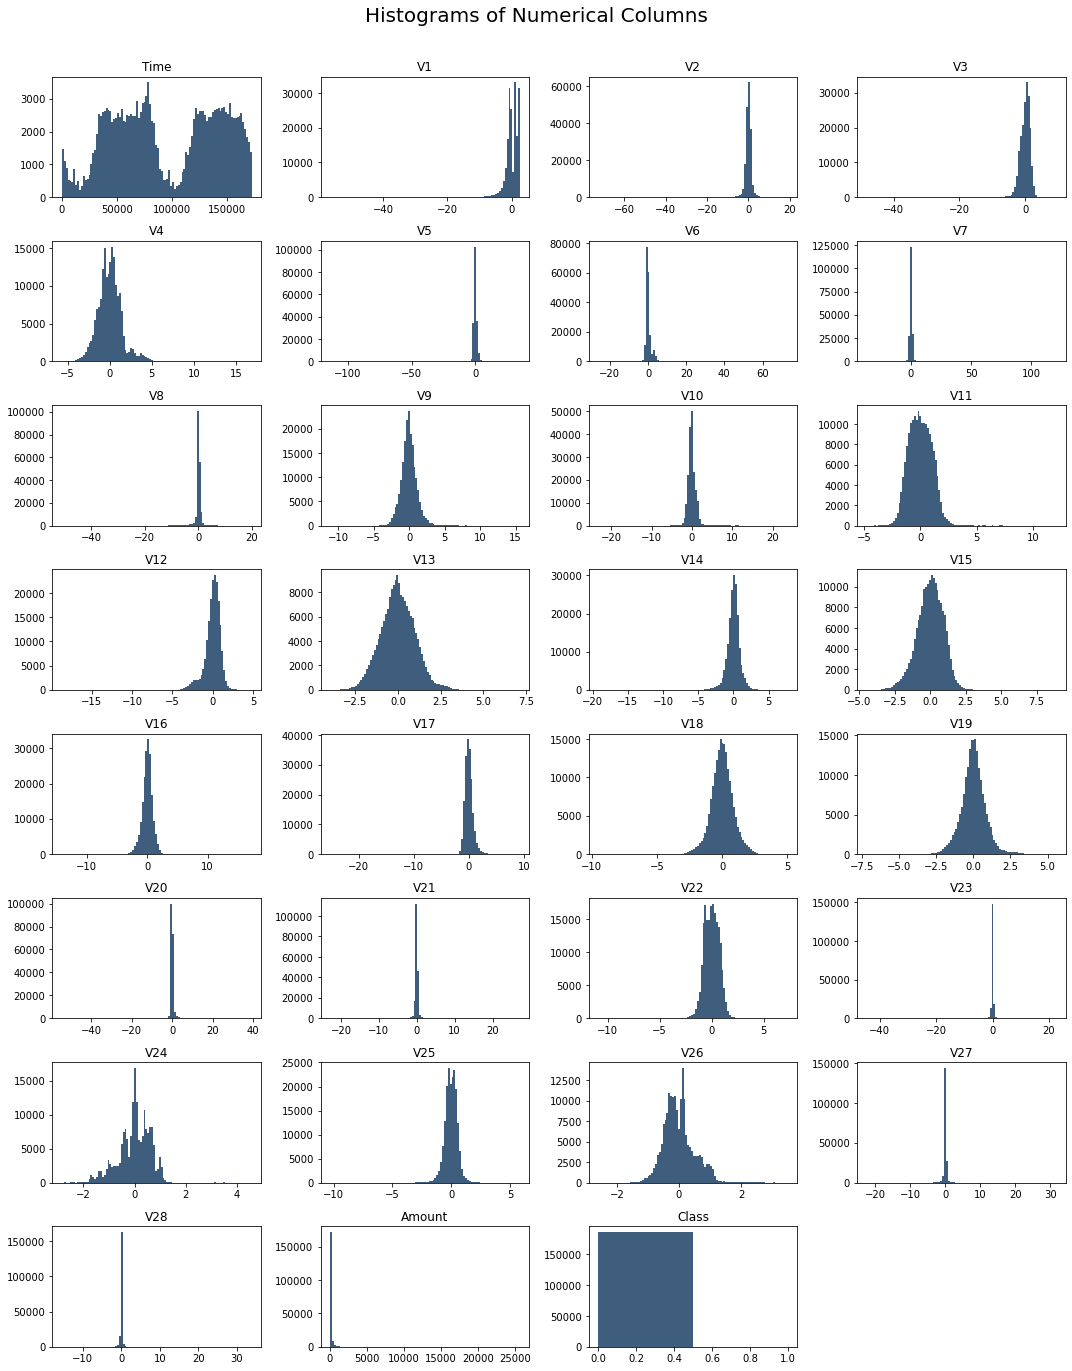

In [6]:
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

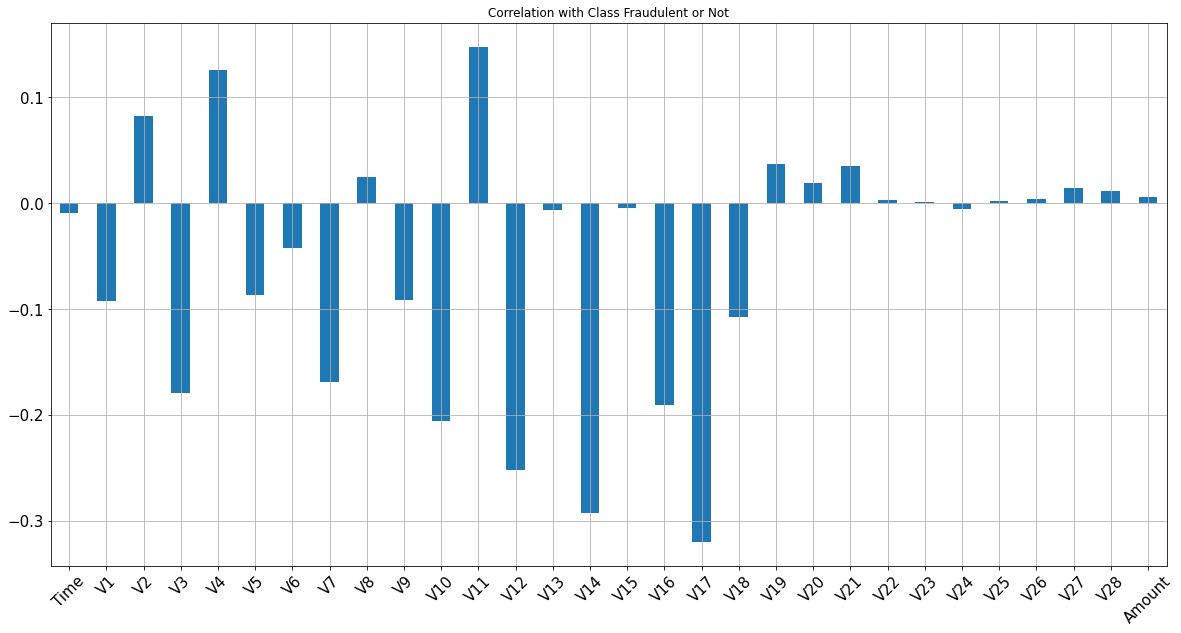

In [7]:
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

## Pre-processing

In [8]:
#from sklearn.preprocessing import StandardScaler
#data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
#data = data.drop(['Amount'],axis=1)


In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0


In [10]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,-0.058119,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,-0.093670,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,0.182768,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,0.849479,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,0.744263,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0


In [11]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [12]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [14]:
X_train.shape

(130200, 29)

In [15]:
X_test.shape

(55800, 29)

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
random_forest = RandomForestClassifier(n_estimators=100)

In [18]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [19]:
y_pred = random_forest.predict(X_test)

In [20]:
acc1=random_forest.score(X_test,y_test)
acc1

0.9994802867383512

In [21]:
cnf_matrix = confusion_matrix(y_test,y_pred)

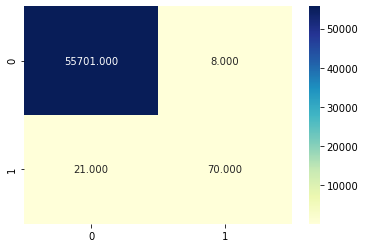

In [22]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [24]:
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.99948,0.230769,0.769231,0.897436,0.828402


# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB() 
model1.fit(X_train, y_train) 

y_pred = model1.predict(X_test) 

y_pred

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn import metrics

acc2=metrics.accuracy_score(y_test,y_pred)
print(acc2)

0.978494623655914


In [27]:
cnf_matrix = confusion_matrix(y_test,y_pred)

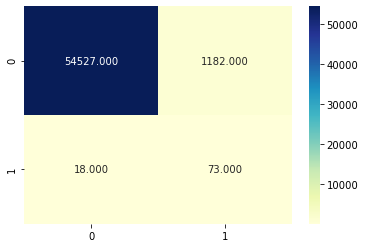

In [28]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [29]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
model_results = pd.DataFrame([['Naive Bayes', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999480,0.230769,0.769231,0.897436,0.828402
1,Naive Bayes,0.978495,0.197802,0.802198,0.058167,0.108470


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier 

model3=DecisionTreeClassifier()


model3.fit(X_train, y_train) 
 
y_pred = model3.predict(X_test)
acc3=metrics.accuracy_score(y_test,y_pred)
print(acc3)

0.9992293906810036


In [32]:
cnf_matrix = confusion_matrix(y_test,y_pred)

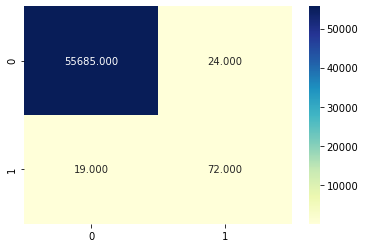

In [33]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [34]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [35]:
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999480,0.230769,0.769231,0.897436,0.828402
1,Naive Bayes,0.978495,0.197802,0.802198,0.058167,0.108470
2,DecisionTree,0.999229,0.208791,0.791209,0.750000,0.770053


# Support Vector Machine

In [36]:
from sklearn import svm

model4 = svm.SVC()

model4.fit(X_train, y_train) 

y_pred = model4.predict(X_test) 

acc4=metrics.accuracy_score(y_test,y_pred)
print(acc4)



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9986021505376345


In [37]:
cnf_matrix = confusion_matrix(y_test,y_pred)

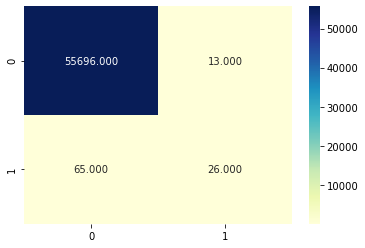

In [38]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [39]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [40]:
model_results = pd.DataFrame([['SVM', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999480,0.230769,0.769231,0.897436,0.828402
1,Naive Bayes,0.978495,0.197802,0.802198,0.058167,0.108470
2,DecisionTree,0.999229,0.208791,0.791209,0.750000,0.770053
3,SVM,0.998602,0.714286,0.285714,0.666667,0.400000


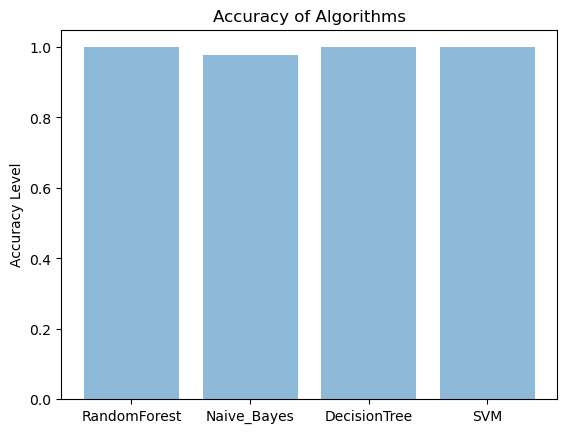

In [41]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('RandomForest','Naive_Bayes','DecisionTree','SVM')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Level')
plt.title('Accuracy of Algorithms')
 
plt.show()

In [42]:
print('Data set:')
print(data.columns)
for col_name in data.columns:
    #if data[col_name].dtypes == 'object' :
    unique_cat = len(data[col_name].unique())
    print(unique_cat)
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()

Data set:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
181299
Feature 'V1' has 181299 categories
181299
Feature 'V2' has 181299 categories
181299
Feature 'V3' has 181299 categories
181299
Feature 'V4' has 181299 categories
181299
Feature 'V5' has 181299 categories
181299
Feature 'V6' has 181299 categories
181299
Feature 'V7' has 181299 categories
181299
Feature 'V8' has 181299 categories
181299
Feature 'V9' has 181299 categories
181299
Feature 'V10' has 181299 categories
181299
Feature 'V11' has 181299 categories
181299
Feature 'V12' has 181299 categories
181299
Feature 'V13' has 181299 categories
181299
Feature 'V14' has 181299 categories
181299
Feature 'V15' has 181299 categories
181299
Feature 'V16' has 181299 categories
181299
Feature 'V17' has 181299 categories
181299
Feature 'V1

In [49]:
from tkinter import *
from tkinter import messagebox

window = Tk()

window.title("Credit Card Fraud detection")

window.geometry('500x200')

lbl = Label(window, text="Enter the amount :", width = 20)
lbl.grid(column=0, row=0, padx=(0, 50), pady = 10)

txt = Entry(window,width=20)
txt.grid(column=1, row=0, pady=10)

result = Label(window, text='')
result.grid(column=1, row=2, pady=10)

def check() :
    amt = txt.get()
    if not amt :
        result.configure(text="Please enter the amount")
    else :
        detect(float(amt))

def detect(amt):
    
  
    s = "Credit card acc no" + str(amt) + "' is" 
    
    
    test_df = data.loc[data["Amount"] == amt]
    del test_df['Class']

    test_df.reset_index(inplace = True, drop = True)
    predicted = int(model1.predict(test_df)[0])
    
    if(predicted == 0) :
        messagebox.showinfo("Safe", "Transaction successful!")
    else :
        messagebox.showwarning("Alert!!", "Fraud Transaction!")
        


btn = Button(window, text="Check", command = check)
btn.grid(column=1, row=1,pady=10)

window.mainloop()